<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-07-08 19:30:58.164624


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

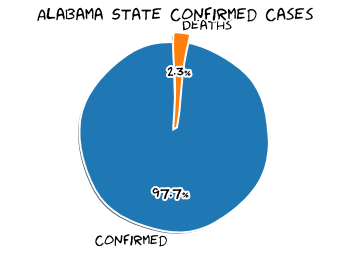

Alabama State Total Population
4887871
Alabama State Confirmed
46962 (0.9607864037328319% of population)
Alabama State Deaths
1058 (2.25288531152847% of confirmed)



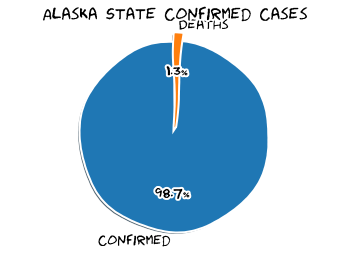

Alaska State Total Population
737438
Alaska State Confirmed
1180 (0.1600134519783358% of population)
Alaska State Deaths
15 (1.2711864406779663% of confirmed)



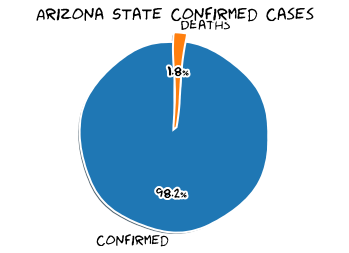

Arizona State Total Population
7171646
Arizona State Confirmed
108614 (1.5144919311410519% of population)
Arizona State Deaths
1962 (1.8063969654004086% of confirmed)



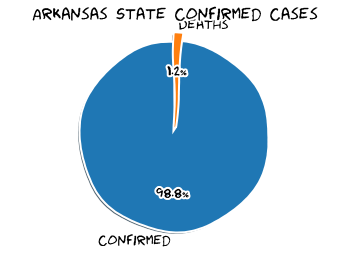

Arkansas State Total Population
3013825
Arkansas State Confirmed
24512 (0.8133186233440894% of population)
Arkansas State Deaths
301 (1.2279699738903396% of confirmed)



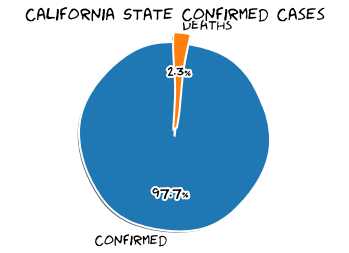

California State Total Population
39557045
California State Confirmed
284139 (0.7183018852899654% of population)
California State Deaths
6575 (2.31400828467757% of confirmed)



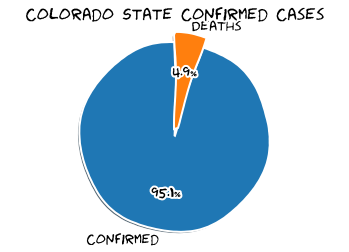

Colorado State Total Population
5695564
Colorado State Confirmed
34647 (0.6083155241517785% of population)
Colorado State Deaths
1696 (4.895084711519035% of confirmed)



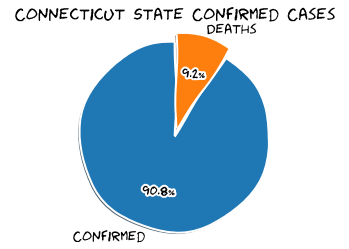

Connecticut State Total Population
3572665
Connecticut State Confirmed
47033 (1.3164682386957636% of population)
Connecticut State Deaths
4338 (9.223311292071525% of confirmed)



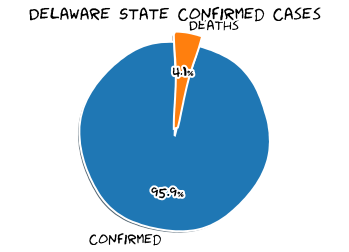

Delaware State Total Population
967171
Delaware State Confirmed
12414 (1.283537244189497% of population)
Delaware State Deaths
514 (4.140486547446431% of confirmed)



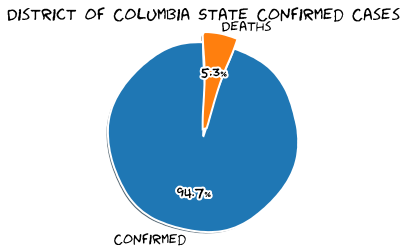

District of Columbia State Total Population
702455
District of Columbia State Confirmed
10642 (1.5149724893409542% of population)
District of Columbia State Deaths
564 (5.299755685021613% of confirmed)



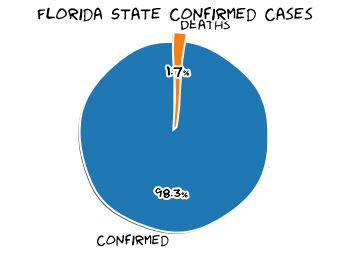

Florida State Total Population
21299325
Florida State Confirmed
223783 (1.0506577086363065% of population)
Florida State Deaths
3889 (1.7378442509037775% of confirmed)



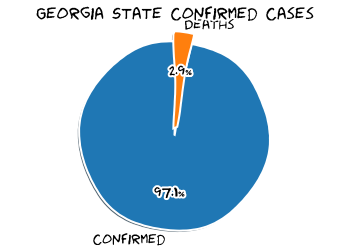

Georgia State Total Population
10519475
Georgia State Confirmed
100470 (0.9550856863103909% of population)
Georgia State Deaths
2899 (2.885438439335125% of confirmed)



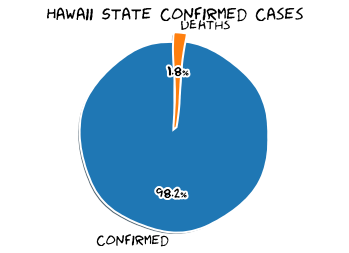

Hawaii State Total Population
1420491
Hawaii State Confirmed
1071 (0.0753964650251216% of population)
Hawaii State Deaths
19 (1.7740429505135387% of confirmed)



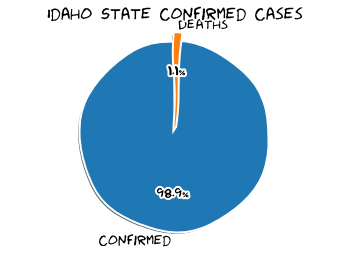

Idaho State Total Population
1754208
Idaho State Confirmed
8539 (0.4867723781900436% of population)
Idaho State Deaths
94 (1.1008314790959128% of confirmed)



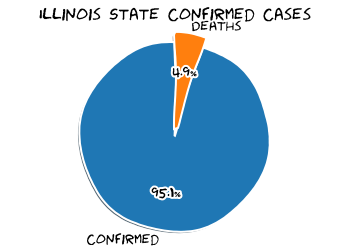

Illinois State Total Population
12741080
Illinois State Confirmed
149574 (1.1739507168937013% of population)
Illinois State Deaths
7273 (4.862476098787223% of confirmed)



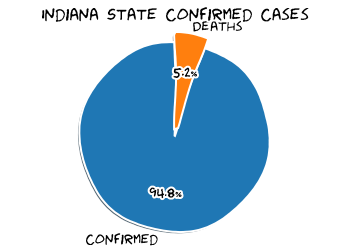

Indiana State Total Population
6691878
Indiana State Confirmed
49063 (0.7331723620783284% of population)
Indiana State Deaths
2539 (5.1749791084931624% of confirmed)



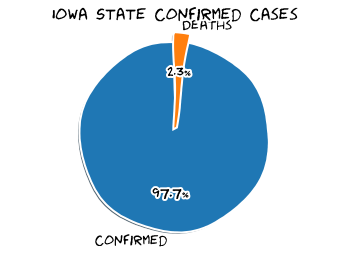

Iowa State Total Population
3156145
Iowa State Confirmed
32392 (1.0263153308862552% of population)
Iowa State Deaths
732 (2.259817238824401% of confirmed)



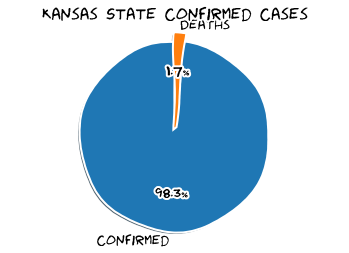

Kansas State Total Population
2911510
Kansas State Confirmed
17190 (0.5904152827914038% of population)
Kansas State Deaths
288 (1.6753926701570683% of confirmed)



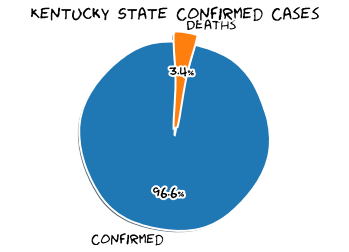

Kentucky State Total Population
4468402
Kentucky State Confirmed
17519 (0.3920640980824912% of population)
Kentucky State Deaths
602 (3.4362691934471146% of confirmed)



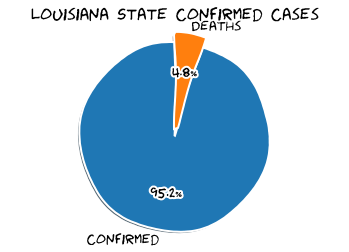

Louisiana State Total Population
4659978
Louisiana State Confirmed
68822 (1.4768739251558698% of population)
Louisiana State Deaths
3324 (4.829850919764029% of confirmed)



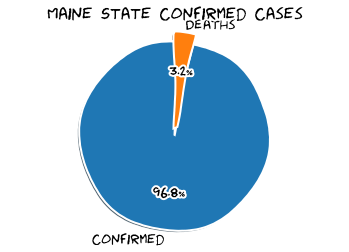

Maine State Total Population
1338404
Maine State Confirmed
3460 (0.25851686037997496% of population)
Maine State Deaths
110 (3.1791907514450863% of confirmed)



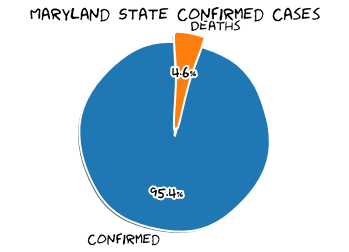

Maryland State Total Population
6042718
Maryland State Confirmed
70861 (1.1726676637897053% of population)
Maryland State Deaths
3256 (4.594911164110018% of confirmed)



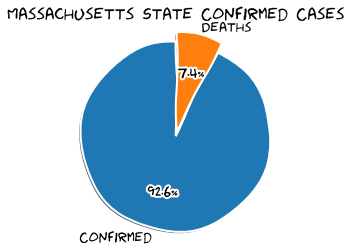

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
110338 (1.5986035653533415% of population)
Massachusetts State Deaths
8213 (7.443491816056118% of confirmed)



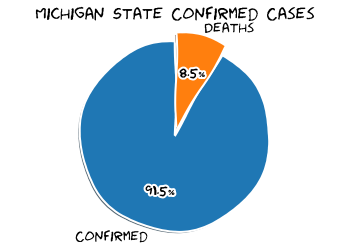

Michigan State Total Population
9995915
Michigan State Confirmed
73637 (0.7366709300749356% of population)
Michigan State Deaths
6239 (8.472642829012589% of confirmed)



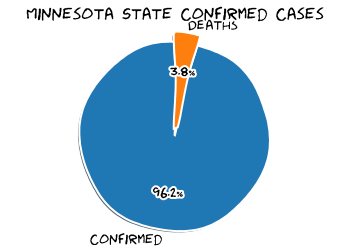

Minnesota State Total Population
5611179
Minnesota State Confirmed
39589 (0.7055379983422378% of population)
Minnesota State Deaths
1523 (3.847028214908182% of confirmed)



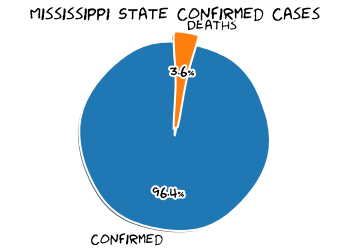

Mississippi State Total Population
2986530
Mississippi State Confirmed
32888 (1.1012111045259885% of population)
Mississippi State Deaths
1188 (3.6122597908051572% of confirmed)



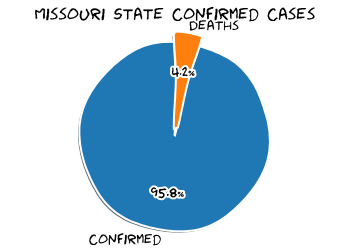

Missouri State Total Population
6126452
Missouri State Confirmed
25553 (0.4170929601668307% of population)
Missouri State Deaths
1068 (4.179548389621571% of confirmed)



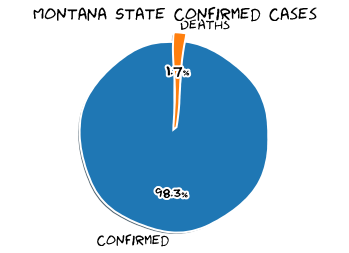

Montana State Total Population
1062305
Montana State Confirmed
1371 (0.1290589802363728% of population)
Montana State Deaths
23 (1.6776075857038657% of confirmed)



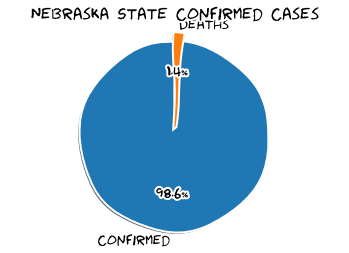

Nebraska State Total Population
1929268
Nebraska State Confirmed
20201 (1.0470810690894163% of population)
Nebraska State Deaths
282 (1.3959704965100737% of confirmed)



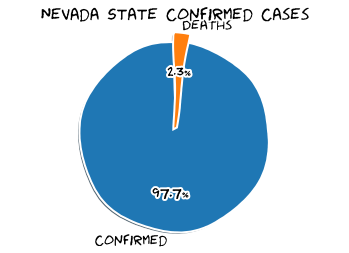

Nevada State Total Population
3034392
Nevada State Confirmed
24301 (0.8008523618570046% of population)
Nevada State Deaths
553 (2.2756265174272663% of confirmed)



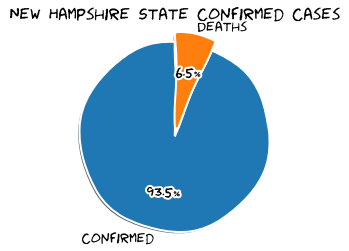

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
5932 (0.43731542001300444% of population)
New Hampshire State Deaths
384 (6.473364801078894% of confirmed)



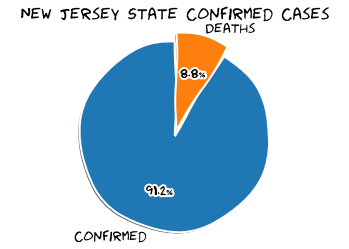

New Jersey State Total Population
8908520
New Jersey State Confirmed
174039 (1.9536241710183062% of population)
New Jersey State Deaths
15332 (8.809519705353399% of confirmed)



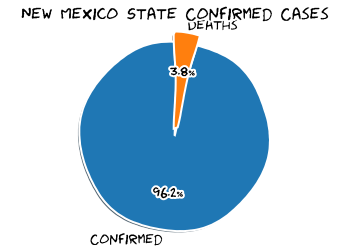

New Mexico State Total Population
2095428
New Mexico State Confirmed
13727 (0.6550928974892003% of population)
New Mexico State Deaths
519 (3.7808698186056677% of confirmed)



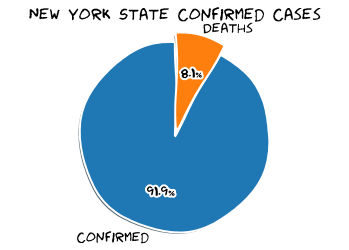

New York State Total Population
19542209
New York State Confirmed
398929 (2.0413710650622967% of population)
New York State Deaths
32251 (8.084395970210238% of confirmed)



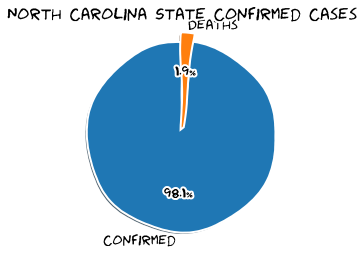

North Carolina State Total Population
10383620
North Carolina State Confirmed
77669 (0.7479954004480133% of population)
North Carolina State Deaths
1462 (1.8823468822825065% of confirmed)



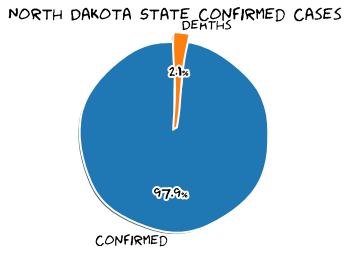

North Dakota State Total Population
760077
North Dakota State Confirmed
3971 (0.5224470678628612% of population)
North Dakota State Deaths
85 (2.140518761017376% of confirmed)



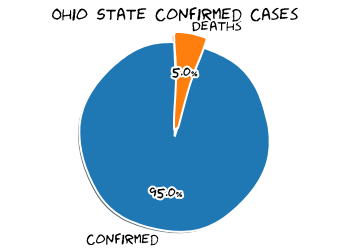

Ohio State Total Population
11689442
Ohio State Confirmed
60181 (0.5148321023364503% of population)
Ohio State Deaths
2991 (4.970007145112245% of confirmed)



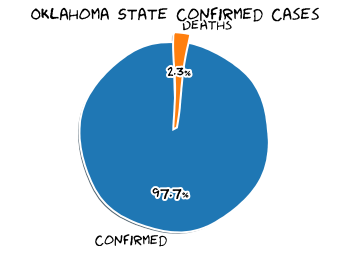

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
17894 (0.45380779842351626% of population)
Oklahoma State Deaths
407 (2.2745054208114452% of confirmed)



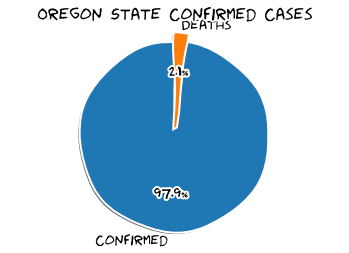

Oregon State Total Population
4190713
Oregon State Confirmed
10605 (0.25305956289538317% of population)
Oregon State Deaths
220 (2.0744931636020745% of confirmed)



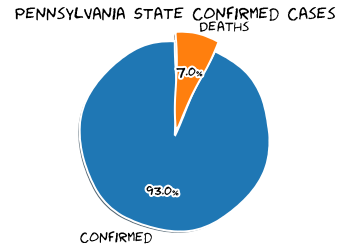

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
96725 (0.7552474963028205% of population)
Pennsylvania State Deaths
6812 (7.042646678728354% of confirmed)



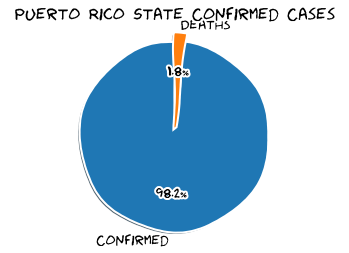

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
8745 (0.2736958136277042% of population)
Puerto Rico State Deaths
159 (1.8181818181818181% of confirmed)



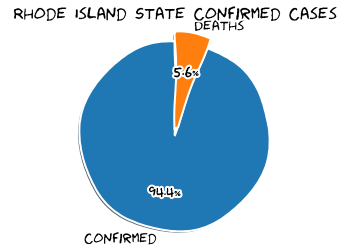

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
17204 (1.6271404453734224% of population)
Rhode Island State Deaths
971 (5.644036270634737% of confirmed)



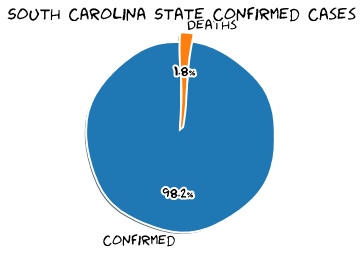

South Carolina State Total Population
5084127
South Carolina State Confirmed
48900 (0.9618170435160254% of population)
South Carolina State Deaths
883 (1.805725971370143% of confirmed)



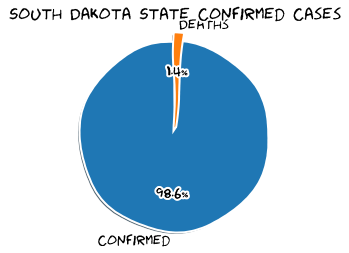

South Dakota State Total Population
882235
South Dakota State Confirmed
7242 (0.8208697229196302% of population)
South Dakota State Deaths
98 (1.3532173432753383% of confirmed)



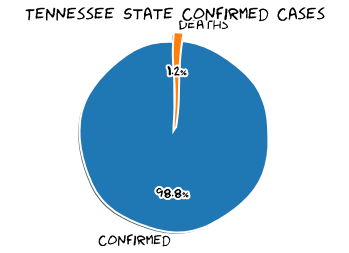

Tennessee State Total Population
6770010
Tennessee State Confirmed
53514 (0.790456734923582% of population)
Tennessee State Deaths
665 (1.242665470717943% of confirmed)



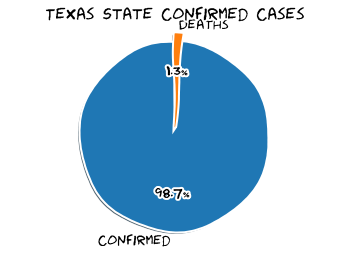

Texas State Total Population
28701845
Texas State Confirmed
216026 (0.752655447759543% of population)
Texas State Deaths
2778 (1.2859563200725839% of confirmed)



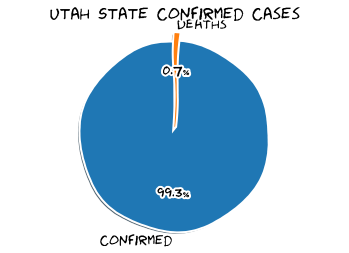

Utah State Total Population
3161105
Utah State Confirmed
26033 (0.8235411351410346% of population)
Utah State Deaths
194 (0.7452080052241385% of confirmed)



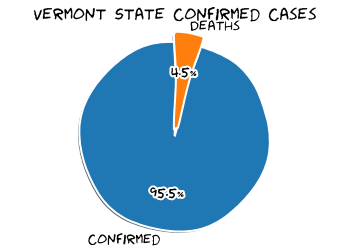

Vermont State Total Population
626299
Vermont State Confirmed
1256 (0.20054319103175958% of population)
Vermont State Deaths
56 (4.45859872611465% of confirmed)



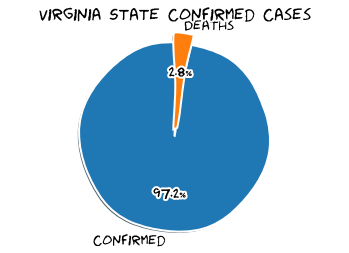

Virginia State Total Population
8517685
Virginia State Confirmed
67630 (0.793995081997045% of population)
Virginia State Deaths
1904 (2.8153186455714923% of confirmed)



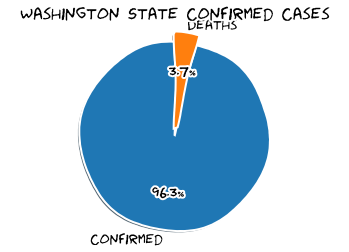

Washington State Total Population
7535591
Washington State Confirmed
37420 (0.4965768444704603% of population)
Washington State Deaths
1384 (3.698556921432389% of confirmed)



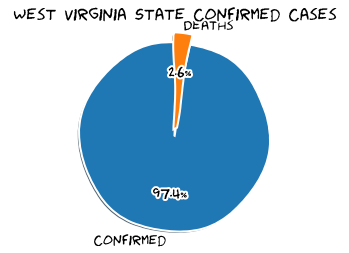

West Virginia State Total Population
1805832
West Virginia State Confirmed
3615 (0.20018473479260526% of population)
West Virginia State Deaths
95 (2.627939142461964% of confirmed)



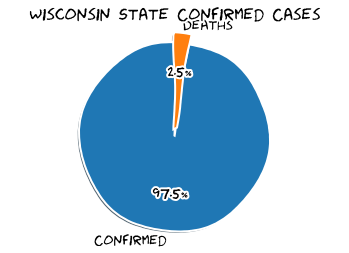

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
32556 (0.5600003302618977% of population)
Wisconsin State Deaths
805 (2.4726624892492937% of confirmed)



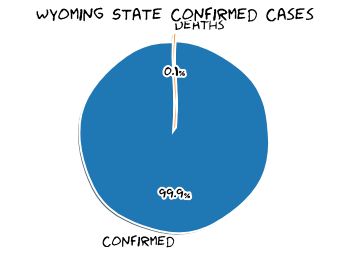

Wyoming State Total Population
577737
Wyoming State Confirmed
1709 (0.2958093388514151% of population)
Wyoming State Deaths
1 (0.058513750731421885% of confirmed)



In [10]:
for i in states:
    state_details(i)

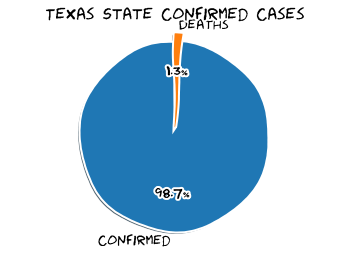

Texas State Total Population
28701845
Texas State Confirmed
216026 (0.752655447759543% of population)
Texas State Deaths
2778 (1.2859563200725839% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
3022899
US Deaths
131609

New York City Confirmed
217777
New York City Deaths
23224

Philippines Confirmed
50359
Philippines Deaths
1314



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 11900855},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 545728},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-07-08T18:33:56.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 6491377},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-07-08 05:33:48,34.22333378,-82.46170658,134,1,0,133,"Abbeville, South Carolina, US",546.336690178171,0.746268656716418
1,22001,Acadia,Louisiana,US,2020-07-08 05:33:48,30.2950649,-92.41419698,1068,43,0,1025,"Acadia, Louisiana, US",1721.3312918043357,4.02621722846442
2,51001,Accomack,Virginia,US,2020-07-08 05:33:48,37.76707161,-75.63234615,1042,14,0,1028,"Accomack, Virginia, US",3224.4089615051366,1.3435700575815739
3,16001,Ada,Idaho,US,2020-07-08 05:33:48,43.4526575,-116.24155159999998,3252,23,0,3229,"Ada, Idaho, US",675.2673971681129,0.7072570725707257
4,19001,Adair,Iowa,US,2020-07-08 05:33:48,41.33075609,-94.47105874,16,0,0,16,"Adair, Iowa, US",223.71364653243847,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,,,,Yemen,2020-07-08 05:33:48,15.552726999999999,48.516388,1297,348,591,358,Yemen,4.348559617578883,26.831148804934465
3799,,,,Zambia,2020-07-08 05:33:48,-13.133897,27.849332,1895,42,1348,505,Zambia,10.307901085054816,2.216358839050132
3800,,,,Zimbabwe,2020-07-08 05:33:48,-19.015438,29.154857,787,9,201,577,Zimbabwe,5.295053928475864,1.1435832274459974
3801,41069,Wheeler,Oregon,US,2020-07-06 19:33:59,44.72698162,-120.02814270000002,0,0,0,0,"Wheeler, Oregon, US",0.0,


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1594233236000,40.767273,-73.971526,217777,0,23224,194553,New York City,36061,"New York City, New York, US",2612.231983,None,None,84036061,USA
1,California,US,1594233236000,34.308284,-118.228241,120764,0,3582,117182,Los Angeles,06037,"Los Angeles, California, US",1202.935679,None,None,84006037,USA
2,Illinois,US,1594233236000,41.841448,-87.816588,93053,0,4651,88402,Cook,17031,"Cook, Illinois, US",1806.772626,None,None,84017031,USA
3,Arizona,US,1594233236000,33.348359,-112.491815,70128,0,959,69169,Maricopa,04013,"Maricopa, Arizona, US",1563.467720,None,None,84004013,USA
4,Florida,US,1594233236000,25.611236,-80.551706,53974,0,1068,52906,Miami-Dade,12086,"Miami-Dade, Florida, US",1986.573130,None,None,84012086,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,New Hampshire,US,1594233236000,NaN,NaN,1,0,0,1,Unassigned,90033,"Unassigned, New Hampshire, US",NaN,None,None,84090033,USA
3081,Kansas,US,1594233236000,39.784208,-97.087532,1,0,0,1,Washington,20201,"Washington, Kansas, US",18.497965,None,None,84020201,USA
3082,West Virginia,US,1594233236000,38.493709,-80.420202,1,0,0,1,Webster,54101,"Webster, West Virginia, US",12.324378,None,None,84054101,USA
3083,Wyoming,US,1594233236000,43.839612,-104.567488,1,0,0,1,Weston,56045,"Weston, Wyoming, US",14.436264,None,None,84056045,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1594233236000,40.767273,-73.971526,217777,0,23224,194553,New York City,36061,"New York City, New York, US",2612.231983,None,None,84036061,USA
5,New York,US,1594233236000,40.740665,-73.589419,42122,0,2188,39934,Nassau,36059,"Nassau, New York, US",3104.226913,None,None,84036059,USA
6,New York,US,1594233236000,40.883201,-72.801217,41799,0,1985,39814,Suffolk,36103,"Suffolk, New York, US",2830.757937,None,None,84036103,USA
8,New York,US,1594233236000,41.162784,-73.757417,35154,0,1431,33723,Westchester,36119,"Westchester, New York, US",3633.465839,None,None,84036119,USA
36,New York,US,1594233236000,41.150279,-74.025605,13679,0,668,13011,Rockland,36087,"Rockland, New York, US",4198.729853,None,None,84036087,USA
52,New York,US,1594233236000,41.403375,-74.302408,10806,0,484,10322,Orange,36071,"Orange, New York, US",2807.190731,None,None,84036071,USA
81,New York,US,1594233236000,42.762490,-78.730637,7596,0,639,6957,Erie,36029,"Erie, New York, US",826.818707,None,None,84036029,USA
136,New York,US,1594233236000,41.764861,-73.743567,4250,0,152,4098,Dutchess,36027,"Dutchess, New York, US",1444.507134,None,None,84036027,USA
145,New York,US,1594233236000,43.146389,-77.693229,4046,0,273,3773,Monroe,36055,"Monroe, New York, US",545.452094,None,None,84036055,USA
180,New York,US,1594233236000,43.004919,-76.199712,3029,0,188,2841,Onondaga,36067,"Onondaga, New York, US",657.723309,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

398929

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1594233236000,40.767273,-73.971526,217777,0,23224,194553,New York City,36061,"New York City, New York, US",2612.231983,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
51,None,Philippines,1594233236000,12.879721,121.774017,50359,12588,1314,36457.0,None,None,Philippines,45.955924,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
